# Dungeons And Dragons and Stats

Dungeons and Dragons is a Tabletop Roleplaying game (RPG) produced by Wizards of the coast.

In [0]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")


Lets load in the dataset. Note that this is a tab seperated table. We'll use `\t` as the seperator to get it to load in right.

In [0]:
dnd_df = pd.read_csv("https://raw.githubusercontent.com/ErikSeguinte/dndstats/master/docs/charTable.tsv", sep = '\t')

In [3]:
dnd_df.head()

,name,race,background,date,class,justClass,subclass,level,feats,HP,AC,Str,Dex,Con,Int,Wis,Cha,alignment,skills,weapons,spells,day,processedAlignment,good,lawful,processedRace,processedSpells,processedWeapons
0,9f3a61,Human,Charlatan,2018-07-27T23:53:51Z,Warlock 1,Warlock,The Fiend,1,Lucky,8,12,10,13,16,8,10,16,CN,Sleight of Hand|Insight|Perception|Deception|I...,"Crossbow, light|Eldritch Blast PHB237|Burning ...",Eldritch blast*0|Minor illusion*0|Hex*1|Burnin...,07 27 18,CN,N,C,Human,Eldritch Blast*0|Minor Illusion*0|Hex*1|Burnin...,"Crossbow, Light|Dagger"
1,9f3a61,Human,Custom,2018-07-27T17:07:02Z,Warlock 1,Warlock,The Fiend,1,Lucky,8,12,10,13,16,8,10,16,CN,Insight|Deception|Intimidation,"Crossbow, light|Eldritch Blast PHB237|Burning ...",Eldritch blast*0|Minor illusion*0|Hex*1|Burnin...,07 27 18,CN,N,C,Human,Eldritch Blast*0|Minor Illusion*0|Hex*1|Burnin...,"Crossbow, Light|Dagger"
2,7a2bfc,Kenku,Criminal,2018-05-27T20:14:52Z,Warlock 3,Warlock,The Celestial,3,NaN,13,13,8,15,10,14,13,15,NaN,Sleight of Hand|Stealth|Arcana|Religion|Deception,"Crossbow, Light|Dagger",Light*0|Sacred Flame*0|Eldritch Blast*0|Agoniz...,05 27 18,NaN,NaN,NaN,Kenku,Light*0|Sacred Flame*0|Eldritch Blast*0|Eldrit...,"Crossbow, Light|Dagger"
3,aa8854,High Elf,Criminal,2018-08-04T15:45:17Z,Wizard 1,Wizard,NaN,1,NaN,7,13,10,16,13,16,12,8,NaN,Stealth|Arcana|Investigation|Perception|Deception,Quarterstaff,NaN,08 04 18,NaN,NaN,NaN,Elf,NaN,Quarterstaff
4,26410c,Firbolg,Folk Hero,2018-07-26T03:31:17Z,Cleric 4,Cleric,Trickery Domain,4,Inspiring Leader,42,16,16,11,18,13,18,14,NaN,History|Animal Handling|Insight|Survival,"Mace|Crossbow, light",Charm Person*1|Disguise Self*1|Mirror Image*2|...,07 25 18,NaN,NaN,NaN,Firbolg,Charm Person*1|Disguise Self*1|Mirror Image*2|...,"Mace|Crossbow, Light"


The maintainer of this Dataset already did some processing and cleanup. (See the `Processed*` columns, but we're going to ignore those. This is supposed to be a learning experience, right?

Lets start with classes. What do these values look like?

In [4]:
pd.set_option('display.max_rows', 10)
dnd_df['class'].value_counts()


Fighter 1               50
Rogue 1                 44
Cleric 1                32
Ranger 1                30
Sorcerer 1              29
                        ..
Paladin 20               1
Fighter 5|Rogue 2        1
Paladin 7|Sorcerer 1     1
Ranger 15                1
Wizard 12                1
Name: class, Length: 309, dtype: int64

Looks like there are a few issues. The first is that Class and level have been combined. So a 1st level wizard is in listed as `Wizard 1`. We'll want to split those up into class and level.

The next thing is multiclassing. Someone can be `wizard 1` and `barbarian 2`. In the data, they are seperated by the `|` character. We'll start by cleaning this up.

First, we'll use the `str.split()` function of the `pd.DataFrame` class to turn this string into a list of strings. Note that rows with only a single class are still turned into a list with 1 element.



In [5]:
dnd_df['class'] = dnd_df['class'].str.split('|')
dnd_df['class']

0                  [Warlock 1]
1                  [Warlock 1]
2                  [Warlock 3]
3                   [Wizard 1]
4                   [Cleric 4]
                 ...          
1342              [Warlock 20]
1343              [Paladin 20]
1344    [Wizard 20, Cleric 10]
1345                [Druid 12]
1346             [Barbarian 3]
Name: class, Length: 1347, dtype: object

In [6]:
# Drop anyone with more than 2 classes
valid_multiclass = dnd_df['class'].str.len() <= 2
dnd_df = dnd_df[valid_multiclass]
dnd_df.head(5)

,name,race,background,date,class,justClass,subclass,level,feats,HP,AC,Str,Dex,Con,Int,Wis,Cha,alignment,skills,weapons,spells,day,processedAlignment,good,lawful,processedRace,processedSpells,processedWeapons
0,9f3a61,Human,Charlatan,2018-07-27T23:53:51Z,[Warlock 1],Warlock,The Fiend,1,Lucky,8,12,10,13,16,8,10,16,CN,Sleight of Hand|Insight|Perception|Deception|I...,"Crossbow, light|Eldritch Blast PHB237|Burning ...",Eldritch blast*0|Minor illusion*0|Hex*1|Burnin...,07 27 18,CN,N,C,Human,Eldritch Blast*0|Minor Illusion*0|Hex*1|Burnin...,"Crossbow, Light|Dagger"
1,9f3a61,Human,Custom,2018-07-27T17:07:02Z,[Warlock 1],Warlock,The Fiend,1,Lucky,8,12,10,13,16,8,10,16,CN,Insight|Deception|Intimidation,"Crossbow, light|Eldritch Blast PHB237|Burning ...",Eldritch blast*0|Minor illusion*0|Hex*1|Burnin...,07 27 18,CN,N,C,Human,Eldritch Blast*0|Minor Illusion*0|Hex*1|Burnin...,"Crossbow, Light|Dagger"
2,7a2bfc,Kenku,Criminal,2018-05-27T20:14:52Z,[Warlock 3],Warlock,The Celestial,3,NaN,13,13,8,15,10,14,13,15,NaN,Sleight of Hand|Stealth|Arcana|Religion|Deception,"Crossbow, Light|Dagger",Light*0|Sacred Flame*0|Eldritch Blast*0|Agoniz...,05 27 18,NaN,NaN,NaN,Kenku,Light*0|Sacred Flame*0|Eldritch Blast*0|Eldrit...,"Crossbow, Light|Dagger"
3,aa8854,High Elf,Criminal,2018-08-04T15:45:17Z,[Wizard 1],Wizard,NaN,1,NaN,7,13,10,16,13,16,12,8,NaN,Stealth|Arcana|Investigation|Perception|Deception,Quarterstaff,NaN,08 04 18,NaN,NaN,NaN,Elf,NaN,Quarterstaff
4,26410c,Firbolg,Folk Hero,2018-07-26T03:31:17Z,[Cleric 4],Cleric,Trickery Domain,4,Inspiring Leader,42,16,16,11,18,13,18,14,NaN,History|Animal Handling|Insight|Survival,"Mace|Crossbow, light",Charm Person*1|Disguise Self*1|Mirror Image*2|...,07 25 18,NaN,NaN,NaN,Firbolg,Charm Person*1|Disguise Self*1|Mirror Image*2|...,"Mace|Crossbow, Light"


In [7]:
# Split Class list into 2 columns, class 1 and 2
dnd_df[['class1', 'class2']] = pd.DataFrame(dnd_df['class'].values.tolist(), index = dnd_df.index)
dnd_df.head()

,name,race,background,date,class,justClass,subclass,level,feats,HP,AC,Str,Dex,Con,Int,Wis,Cha,alignment,skills,weapons,spells,day,processedAlignment,good,lawful,processedRace,processedSpells,processedWeapons,class1,class2
0,9f3a61,Human,Charlatan,2018-07-27T23:53:51Z,[Warlock 1],Warlock,The Fiend,1,Lucky,8,12,10,13,16,8,10,16,CN,Sleight of Hand|Insight|Perception|Deception|I...,"Crossbow, light|Eldritch Blast PHB237|Burning ...",Eldritch blast*0|Minor illusion*0|Hex*1|Burnin...,07 27 18,CN,N,C,Human,Eldritch Blast*0|Minor Illusion*0|Hex*1|Burnin...,"Crossbow, Light|Dagger",Warlock 1,None
1,9f3a61,Human,Custom,2018-07-27T17:07:02Z,[Warlock 1],Warlock,The Fiend,1,Lucky,8,12,10,13,16,8,10,16,CN,Insight|Deception|Intimidation,"Crossbow, light|Eldritch Blast PHB237|Burning ...",Eldritch blast*0|Minor illusion*0|Hex*1|Burnin...,07 27 18,CN,N,C,Human,Eldritch Blast*0|Minor Illusion*0|Hex*1|Burnin...,"Crossbow, Light|Dagger",Warlock 1,None
2,7a2bfc,Kenku,Criminal,2018-05-27T20:14:52Z,[Warlock 3],Warlock,The Celestial,3,NaN,13,13,8,15,10,14,13,15,NaN,Sleight of Hand|Stealth|Arcana|Religion|Deception,"Crossbow, Light|Dagger",Light*0|Sacred Flame*0|Eldritch Blast*0|Agoniz...,05 27 18,NaN,NaN,NaN,Kenku,Light*0|Sacred Flame*0|Eldritch Blast*0|Eldrit...,"Crossbow, Light|Dagger",Warlock 3,None
3,aa8854,High Elf,Criminal,2018-08-04T15:45:17Z,[Wizard 1],Wizard,NaN,1,NaN,7,13,10,16,13,16,12,8,NaN,Stealth|Arcana|Investigation|Perception|Deception,Quarterstaff,NaN,08 04 18,NaN,NaN,NaN,Elf,NaN,Quarterstaff,Wizard 1,None
4,26410c,Firbolg,Folk Hero,2018-07-26T03:31:17Z,[Cleric 4],Cleric,Trickery Domain,4,Inspiring Leader,42,16,16,11,18,13,18,14,NaN,History|Animal Handling|Insight|Survival,"Mace|Crossbow, light",Charm Person*1|Disguise Self*1|Mirror Image*2|...,07 25 18,NaN,NaN,NaN,Firbolg,Charm Person*1|Disguise Self*1|Mirror Image*2|...,"Mace|Crossbow, Light",Cleric 4,None


In [8]:
dnd_df.sample(5)

,name,race,background,date,class,justClass,subclass,level,feats,HP,AC,Str,Dex,Con,Int,Wis,Cha,alignment,skills,weapons,spells,day,processedAlignment,good,lawful,processedRace,processedSpells,processedWeapons,class1,class2
870,1e53d2,Human,Knight,2018-08-12T10:42:36Z,[Fighter 5],Fighter,Champion,5,NaN,39,18,19,16,13,12,17,15,NaN,Athletics|History|Survival|Persuasion,Greatsword|Handaxe,NaN,08 12 18,NaN,NaN,NaN,Human,NaN,Greatsword|Handaxe,Fighter 5,None
378,5bb250,Wood Elf,Outlander,2018-06-01T03:07:21Z,"[Monk 10, Druid 5]",Monk|Druid,Way of the Kensei|Circle of the Moon,15,NaN,107,17,8,19,13,13,17,11,n,Athletics|Stealth|Nature|Perception|Survival,Sahuagin Claw Gauntlet |Scoped Longbow|Fling D...,Druidcraft*0|Guidance*0|Mending*0|Poison Spray...,05 31 18,NN,N,N,Elf,Druidcraft*0|Guidance*0|Mending*0|Poison Spray...,Longbow|Blowgun,Monk 10,Druid 5
824,1f8dfb,Human,Haunted One,2018-07-07T21:54:52Z,[Ranger 6],Ranger,Monster Slayer,6,NaN,68,14,16,16,14,15,15,15,NaN,Athletics|Stealth|Investigation|Insight|Survival,Sickle|Quarterstaff|Longbow|Shortsword|Hand Cr...,Protection from Evil and Good*1|Cure Wounds (1...,07 07 18,NaN,NaN,NaN,Human,Protection from Evil and Good*1|Cure Wounds*1|...,Sickle|Quarterstaff|Longbow|Shortsword|Battleaxe,Ranger 6,None
595,834092,Human,Custom,2018-07-18T16:33:26Z,[Fighter 1],Fighter,NaN,1,NaN,12,14,14,16,15,13,11,9,NaN,Athletics|Nature|Animal Handling|Survival,NaN,NaN,07 18 18,NaN,NaN,NaN,Human,NaN,NaN,Fighter 1,None
339,0319b7,Half-Elf,Custom,2018-09-05T22:03:31Z,[Fighter 5],Fighter,Arcane Archer,5,Sharpshooter,49,17,19,16,16,10,13,12,Chaotic Neutral,Athletics|Stealth|Arcana|Medicine|Perception|S...,Longbow|Whip|Dagger|Battleaxe,NaN,09 05 18,CN,N,C,Half-Elf,NaN,Longbow|Whip|Dagger|Battleaxe,Fighter 5,None


In [9]:


dnd_df[['just_class1', 'just_level1']] = pd.DataFrame(dnd_df['class1'].str.rsplit(" ",1, expand = True).values, index = dnd_df.index)
dnd_df[['just_class2', 'just_level2']] = pd.DataFrame(dnd_df['class2'].str.rsplit(" ",1, expand = True).values, index = dnd_df.index)
dnd_df.head()

,name,race,background,date,class,justClass,subclass,level,feats,HP,AC,Str,Dex,Con,Int,Wis,Cha,alignment,skills,weapons,spells,day,processedAlignment,good,lawful,processedRace,processedSpells,processedWeapons,class1,class2,just_class1,just_level1,just_class2,just_level2
0,9f3a61,Human,Charlatan,2018-07-27T23:53:51Z,[Warlock 1],Warlock,The Fiend,1,Lucky,8,12,10,13,16,8,10,16,CN,Sleight of Hand|Insight|Perception|Deception|I...,"Crossbow, light|Eldritch Blast PHB237|Burning ...",Eldritch blast*0|Minor illusion*0|Hex*1|Burnin...,07 27 18,CN,N,C,Human,Eldritch Blast*0|Minor Illusion*0|Hex*1|Burnin...,"Crossbow, Light|Dagger",Warlock 1,None,Warlock,1,None,None
1,9f3a61,Human,Custom,2018-07-27T17:07:02Z,[Warlock 1],Warlock,The Fiend,1,Lucky,8,12,10,13,16,8,10,16,CN,Insight|Deception|Intimidation,"Crossbow, light|Eldritch Blast PHB237|Burning ...",Eldritch blast*0|Minor illusion*0|Hex*1|Burnin...,07 27 18,CN,N,C,Human,Eldritch Blast*0|Minor Illusion*0|Hex*1|Burnin...,"Crossbow, Light|Dagger",Warlock 1,None,Warlock,1,None,None
2,7a2bfc,Kenku,Criminal,2018-05-27T20:14:52Z,[Warlock 3],Warlock,The Celestial,3,NaN,13,13,8,15,10,14,13,15,NaN,Sleight of Hand|Stealth|Arcana|Religion|Deception,"Crossbow, Light|Dagger",Light*0|Sacred Flame*0|Eldritch Blast*0|Agoniz...,05 27 18,NaN,NaN,NaN,Kenku,Light*0|Sacred Flame*0|Eldritch Blast*0|Eldrit...,"Crossbow, Light|Dagger",Warlock 3,None,Warlock,3,None,None
3,aa8854,High Elf,Criminal,2018-08-04T15:45:17Z,[Wizard 1],Wizard,NaN,1,NaN,7,13,10,16,13,16,12,8,NaN,Stealth|Arcana|Investigation|Perception|Deception,Quarterstaff,NaN,08 04 18,NaN,NaN,NaN,Elf,NaN,Quarterstaff,Wizard 1,None,Wizard,1,None,None
4,26410c,Firbolg,Folk Hero,2018-07-26T03:31:17Z,[Cleric 4],Cleric,Trickery Domain,4,Inspiring Leader,42,16,16,11,18,13,18,14,NaN,History|Animal Handling|Insight|Survival,"Mace|Crossbow, light",Charm Person*1|Disguise Self*1|Mirror Image*2|...,07 25 18,NaN,NaN,NaN,Firbolg,Charm Person*1|Disguise Self*1|Mirror Image*2|...,"Mace|Crossbow, Light",Cleric 4,None,Cleric,4,None,None


In [10]:
dnd_df[dnd_df['just_class2'] == 'Revised Ranger'].head()

,name,race,background,date,class,justClass,subclass,level,feats,HP,AC,Str,Dex,Con,Int,Wis,Cha,alignment,skills,weapons,spells,day,processedAlignment,good,lawful,processedRace,processedSpells,processedWeapons,class1,class2,just_class1,just_level1,just_class2,just_level2
238,75040a,Goblin,Criminal,2018-06-24T13:27:55Z,"[Rogue 7, Revised Ranger 5]",Rogue|Revised Ranger,Assassin|Beast Conclave,12,NaN,29,16,8,19,14,14,8,16,NaN,Sleight of Hand|Stealth|Investigation|Percepti...,Rapier|Shortbow|Dagger|Scimitar,Ensnaring Strike*1|Hail Of Thorns*1|Hunters Ma...,06 24 18,NaN,NaN,NaN,Goblin,Ensnaring Strike*1|Hail of Thorns*1|Hunter’s M...,Rapier|Shortbow|Dagger|Scimitar,Rogue 7,Revised Ranger 5,Rogue,7,Revised Ranger,5
239,75040a,Goblin,Criminal,2018-06-16T01:12:10Z,"[Rogue 7, Revised Ranger 5]",Rogue|Revised Ranger,Assassin|Beast Conclave,12,NaN,112,15,8,19,14,14,8,16,NaN,Sleight of Hand|Stealth|Investigation|Percepti...,Rapier|Shortbow|Dagger,Ensnaring Strike*1|Hail Of Thorns*1|Hunters Ma...,06 15 18,NaN,NaN,NaN,Goblin,Ensnaring Strike*1|Hail of Thorns*1|Hunter’s M...,Rapier|Shortbow|Dagger,Rogue 7,Revised Ranger 5,Rogue,7,Revised Ranger,5
855,75040a,Goblin,Criminal,2018-06-23T05:33:10Z,"[Rogue 7, Revised Ranger 5]",Rogue|Revised Ranger,Assassin|Beast Conclave,12,NaN,29,16,8,19,14,14,8,16,NaN,Sleight of Hand|Stealth|Investigation|Percepti...,Rapier|Shortbow|Dagger|Scimitar,Ensnaring Strike*1|Hail Of Thorns*1|Hunters Ma...,06 22 18,NaN,NaN,NaN,Goblin,Ensnaring Strike*1|Hail of Thorns*1|Hunter’s M...,Rapier|Shortbow|Dagger|Scimitar,Rogue 7,Revised Ranger 5,Rogue,7,Revised Ranger,5
856,75040a,Goblin,Criminal,2018-06-16T01:21:48Z,"[Rogue 7, Revised Ranger 5]",Rogue|Revised Ranger,Assassin|Beast Conclave,12,NaN,112,15,8,19,14,14,8,16,NaN,Sleight of Hand|Stealth|Investigation|Percepti...,Rapier|Shortbow|Dagger,Ensnaring Strike*1|Hail Of Thorns*1|Hunters Ma...,06 15 18,NaN,NaN,NaN,Goblin,Ensnaring Strike*1|Hail of Thorns*1|Hunter’s M...,Rapier|Shortbow|Dagger,Rogue 7,Revised Ranger 5,Rogue,7,Revised Ranger,5
1297,cb5042,Dragonborn,Sailor,2018-05-19T18:20:26Z,"[Fighter 8, Revised Ranger 4]",Fighter|Revised Ranger,Sharpshooter|Hunter Conclave,12,Tough,113,18,15,20,14,10,12,11,NaN,Athletics|Acrobatics|Stealth|History|Perceptio...,"Longbow|Rapier|Crossbow, light",Hunters Mark*1|Goodberry*1|Cure Wounds*1,05 19 18,NaN,NaN,NaN,Dragonborn,Hunter’s Mark*1|Goodberry*1|Cure Wounds*1,"Longbow|Rapier|Crossbow, Light",Fighter 8,Revised Ranger 4,Fighter,8,Revised Ranger,4


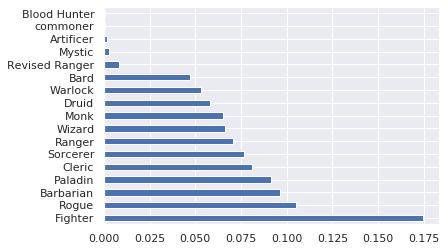

In [11]:
dnd_df['just_class1'].value_counts(normalize=True).plot(kind='barh');

In [0]:
def graph_classes(df):
  ax = sns.countplot(x = 'just_class1', data=df,)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  plt.tight_layout()
  plt.show();

def graph_series(s):
  ax = sns.countplot(x = s.index, data=s)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  plt.tight_layout()
  plt.show();

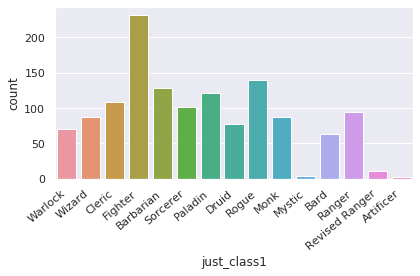

In [13]:
# Drop weird classes 
weird_classes = ['Blood Hunter', 'commoner', 'mystic']
for class_ in weird_classes:
  dnd_df = dnd_df[dnd_df['just_class1'] != class_]

graph_classes(dnd_df)

In [14]:
class_df = pd.concat([dnd_df['just_class1'], dnd_df['just_class2']], ignore_index=True)
class_df.value_counts()

Fighter           253
Cleric            164
Rogue             163
Barbarian         149
Paladin           122
                 ... 
Druid              86
Bard               73
Revised Ranger     17
Mystic              5
Artificer           2
Length: 15, dtype: int64

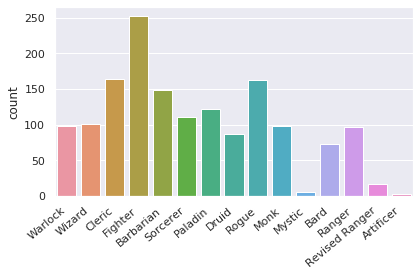

In [15]:
graph_series(class_df)

In [16]:
dnd_df['just_class1'].value_counts()

Fighter           232
Rogue             140
Barbarian         128
Paladin           122
Cleric            108
                 ... 
Warlock            71
Bard               63
Revised Ranger     11
Mystic              4
Artificer           2
Name: just_class1, Length: 15, dtype: int64

In [0]:
second_class_df = dnd_df[dnd_df['just_class2'].notnull()].copy()

In [0]:
second_class_df[['just_class1', 'just_level1']] = second_class_df[['just_class2', 'just_level2']].copy

In [0]:
d